<a href="https://colab.research.google.com/github/ijinshes2ly/LogisticRegression/blob/main/GM_D26_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Î™®Îç∏ Ï†ïÌôïÎèÑ: 1.00
AUC Ï†êÏàò: 1.00
ÌòºÎèô ÌñâÎ†¨:
[[1 0]
 [0 3]]
Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



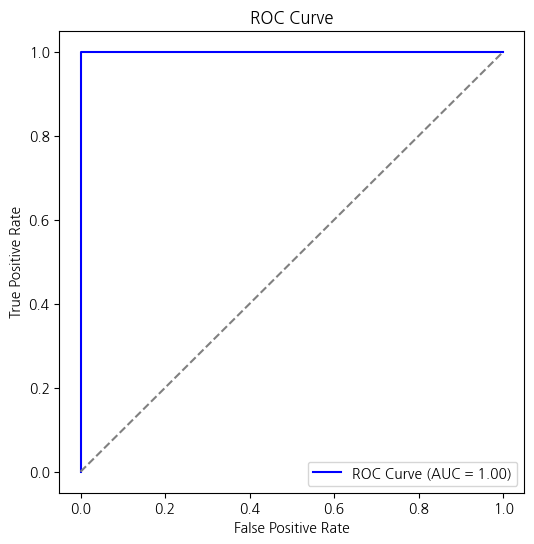

In [17]:
#Í¥ëÍ≥† Ï∫†ÌéòÏù∏ Ï†ÑÌôòÏú® ÏòàÏ∏°
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Í∞ÄÏÉÅÏùò Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'income': [3000, 6000, 3200, 5000, 7200, 6500, 4000, 5800, 7000, 3100,
               4800, 5500, 3900, 6200, 7500, 6700, 3500, 5600, 7100, 4200],
    'browsing_time': [5, 15, 7, 10, 20, 13, 8, 12, 18, 6, 9, 11, 8, 14, 21, 17, 7, 11, 19, 10],
    'num_clicks': [1, 5, 2, 3, 6, 4, 2, 3, 5, 1, 3, 4, 2, 4, 6, 5, 2, 3, 5, 2],
    'ad_exposure': [2, 6, 3, 5, 8, 7, 4, 6, 8, 3, 5, 6, 4, 7, 9, 7, 4, 6, 8, 5],
    'converted': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÎèÖÎ¶ΩÎ≥ÄÏàò X, Ï¢ÖÏÜçÎ≥ÄÏàò y)
X = df[['age', 'income', 'browsing_time', 'num_clicks', 'ad_exposure']]
y = df['converted']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî ÏûÖÎ†• Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression()
model.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.2f}")
print(f"AUC Ï†êÏàò: {auc_score:.2f}")
print("ÌòºÎèô ÌñâÎ†¨:")
print(conf_matrix)
print("Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
print(report)

from sklearn.metrics import roc_curve

# ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


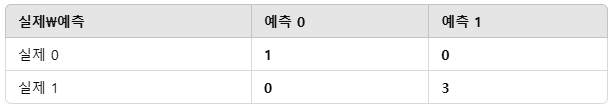

* Ï†ïÌôïÎèÑÍ∞Ä 100%Î°ú Î™®Îç∏Ïù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÎ≤ΩÌïòÍ≤å Î∂ÑÎ•òÌñàÏùå.
* ROCÏª§Î∏åÏùò ÏïÑÎûò Î©¥Ï†ÅÏù∏ ACUÍ∞Ä 1Î°ú ÌÅ¥ÎûòÏä§ 0Í≥º ÌÅ¥ÎûòÏä§ 1ÏùÑ ÏôÑÎ≤ÖÌïòÍ≤å Íµ¨Î∂ÑÌï®.Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï∂©Î∂ÑÌûà Ïã†Î¢∞Ìï† Ïàò ÏûàÏùå.
* * ÌòºÎèôÌñâÎ†¨ Í≤∞Í≥º, Íµ¨Îß§Ï†ÑÌôòÏúºÎ°ú ÏòàÏÉÅÌñàÏùÑ Îïå Ïã§Ï†ú Íµ¨Îß§Ï†ÑÌôòÏúºÎ°ú Î∂ÑÎ•òÎêú TPÎäî 3Í∞ú.
* Íµ¨Îß§Î°ú ÏòàÏÉÅÌñàÏßÄÎßå ÎπÑÍµ¨Îß§Î°ú Î∂ÑÎ•òÎêú FNÏùÄ 0Í∞ú.
* ÎπÑÍµ¨Îß§Î°ú ÏòàÏÉÅÌïòÍ≥† ÎπÑÍµ¨Îß§Î°ú Î∂ÑÎ•ò TNÏùÄ 1Í∞ú.
* ÎπÑÍµ¨Îß§Î°ú ÏòàÏÉÅÌñàÏßÄÎßå Íµ¨Îß§Î°ú Î∂ÑÎ•òÎêú FPÎäî 0Í∞ú.
* Ï†ïÎãµÏùÑ Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÌñàÍ∏∞ÎïåÎ¨∏Ïóê Ï†ïÌôïÎèÑÎäî 100%ÏûÑ.
* Í∞ÅÍ∞ÅÏùò ÌÅ¥ÎûòÏä§Ïùò Ï†ïÎ∞ÄÎèÑ,Ïû¨ÌòÑÏú®,F1Ï†êÏàòÍ∞Ä Î™®Îëê 1Î°ú, Ï†ïÌôïÌïòÍ≤å Î∂ÑÎ•òÍ≥†, Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Ìï®.
*ROCÏª§Î∏åÎäî Î™®Îì† ÏñëÏÑ± ÏÉòÌîåÏùÑ Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°ÌïòÎ©¥ÏÑú ÏùåÏÑ± ÏÉòÌîåÎèÑ Ï†ÑÌòÄ ÌãÄÎ¶¨ÏßÄ ÏïäÏùå.

Î™®Îç∏ Ï†ïÌôïÎèÑ: 1.00
AUC Ï†êÏàò: 1.00
ÌòºÎèô ÌñâÎ†¨:
[[1 0]
 [0 3]]
Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



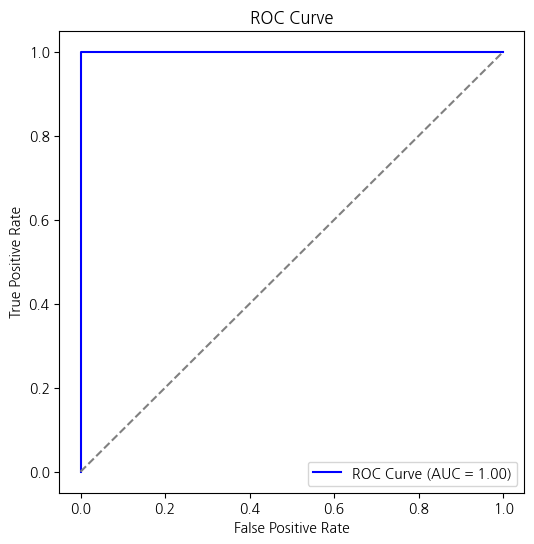

In [14]:
#Ïù¥Î©îÏùº ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏Ïùò Î∞òÏùë ÏòàÏ∏°
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Í∞ÄÏÉÅÏùò Ïù¥Î©îÏùº ÎßàÏºÄÌåÖ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_emails_received': [5, 15, 8, 12, 18, 13, 9, 14, 20, 6,
                            10, 13, 7, 15, 21, 17, 8, 12, 19, 11],
    'avg_response_time': [30, 12, 45, 20, 5, 10, 35, 18, 7, 40,
                          22, 16, 38, 14, 4, 9, 32, 19, 6, 28],
    'num_purchases': [1, 3, 0, 2, 4, 2, 1, 3, 4, 0, 2, 3, 1, 3, 5, 4, 1, 2, 4, 2],
    'past_open_rate': [0.2, 0.8, 0.1, 0.6, 0.9, 0.7, 0.3, 0.65, 0.85, 0.15,
                       0.5, 0.68, 0.25, 0.72, 0.92, 0.78, 0.22, 0.6, 0.88, 0.4],
    'opened_email': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÎèÖÎ¶ΩÎ≥ÄÏàò X, Ï¢ÖÏÜçÎ≥ÄÏàò y)
X = df[['age', 'num_emails_received', 'avg_response_time', 'num_purchases', 'past_open_rate']]
y = df['opened_email']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî ÏûÖÎ†• Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression()
model.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.2f}")
print(f"AUC Ï†êÏàò: {auc_score:.2f}")
print("ÌòºÎèô ÌñâÎ†¨:")
print(conf_matrix)
print("Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
print(report)

#ROC Ïª§Î∏å ÏãúÍ∞ÅÌôî
from sklearn.metrics import roc_curve

# ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


* Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎäî 1Î°ú Î™®Îç∏Ïù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïò¨Î∞îÎ•¥Í≤å Ïûò Î∂ÑÎ•òÌñàÏùå.
* ROC Ïª§Î∏åÏóêÏÑú FPÍ∞Ä 0Ïùº Îïå TPÍ∞Ä 1Í∞ú.
* Ïù¥ÎäîÏù¥Î©îÏùºÏùÑ Ïó¥ÏßÄ ÏïäÏïòÎäîÎç∞ Ïó¥ÏóàÎã§Í≥† Î∂ÑÎ•òÌïòÏßÄ ÏïäÏïòÏúºÎ©∞ Ïù¥Î©îÏùºÏùÑ Ïó¥ÏóàÏùÑ Îïå Ïù¥Î©îÏùºÏùÑ Ïó¥ÏóàÎã§Í≥† ÏñëÏÑ±ÏúºÎ°ú Ï†ïÌôïÌûà Î∂ÑÎ•òÌñàÏùåÏùÑ ÏùòÎØ∏Ìï®.
*AUCÎäî ROCÏª§Î∏å ÏïÑÎûòÏùò Î©¥Ï†Å Í∞íÏùÄ 1ÏûÑ.ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ 100% Ï†ïÌôïÌïòÍ≤å Íµ¨Î≥ÑÌï®.
* Ïù¥Îäî Î™®Îç∏Ïù¥ Î™®Îì† ÏñëÏÑ± ÏÉòÌîåÏùÑ Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°ÌïòÍ≥†, Î™®Îì† ÏùåÏÑ± ÏÉòÌîåÏùÑ Ï†ïÌôïÌïòÍ≤å Î∂ÑÎ•òÌïòÎäî ÏôÑÎ≤ΩÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑÏùÑ ÎúªÌï®.
*


MAE (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): 1.40
MSE (ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®): 3.32
RMSE (Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®): 1.82
R¬≤ (Í≤∞Ï†ï Í≥ÑÏàò): 0.99


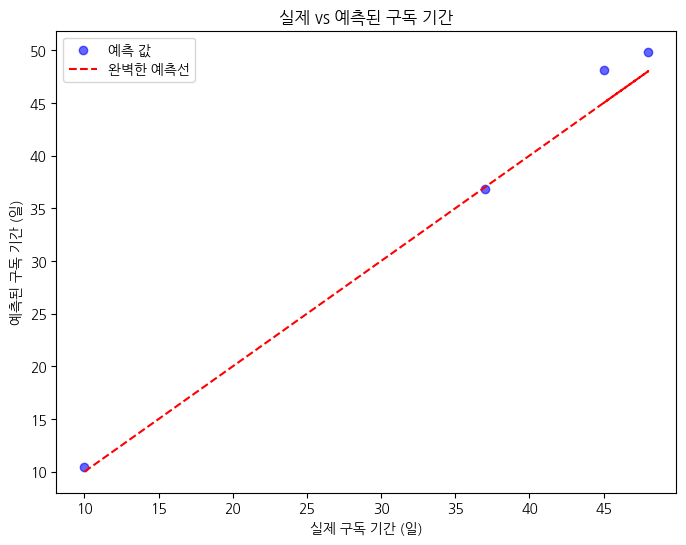

ÏòàÏ∏°Îêú Íµ¨ÎèÖ Í∏∞Í∞Ñ: 21.03 Ïùº


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
#Íµ¨ÎèÖÍ∏∞Í∞ÑÏòàÏ∏°
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib

# Í∞ÄÏÉÅÏùò Ïã†Í∑ú Íµ¨ÎèÖÏûê Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_logins': [2, 15, 3, 10, 20, 12, 5, 9, 18, 4,
                   8, 11, 6, 13, 22, 14, 7, 10, 19, 5],
    'num_watched_videos': [1, 10, 2, 7, 15, 9, 3, 6, 13, 2,
                            5, 8, 3, 9, 18, 11, 4, 7, 14, 4],
    'avg_watch_time': [5, 40, 8, 30, 60, 35, 12, 28, 50, 6,
                       18, 32, 10, 33, 70, 45, 9, 29, 55, 14],
    'subscription_length': [10, 45, 14, 30, 60, 50, 21, 35, 55, 12,
                            28, 40, 18, 42, 70, 48, 15, 37, 58, 20]  # ÌÉÄÍ≤ü Î≥ÄÏàò
}

df = pd.DataFrame(data)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÎèÖÎ¶ΩÎ≥ÄÏàò X, Ï¢ÖÏÜçÎ≥ÄÏàò y)
X = df[['age', 'num_logins', 'num_watched_videos', 'avg_watch_time']]
y = df['subscription_length']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏûÖÎ†•Í∞íÏùÑ ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X_train, y_train)
# ÏòàÏ∏° ÏàòÌñâ
y_pred = model.predict(X_test)
# ÏÑ±Îä• ÌèâÍ∞Ä
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Í≤∞Í≥º Ï∂úÎ†•
print(f"MAE (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): {mae:.2f}")
print(f"MSE (ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®): {mse:.2f}")
print(f"RMSE (Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®): {rmse:.2f}")
print(f"R¬≤ (Í≤∞Ï†ï Í≥ÑÏàò): {r2:.2f}")

#ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# Ïã§Ï†ú Í∞í vs ÏòàÏ∏° Í∞í ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='ÏòàÏ∏° Í∞í')
plt.plot(y_test, y_test, color='red', linestyle='--', label='ÏôÑÎ≤ΩÌïú ÏòàÏ∏°ÏÑ†')
plt.xlabel("Ïã§Ï†ú Íµ¨ÎèÖ Í∏∞Í∞Ñ (Ïùº)")
plt.ylabel("ÏòàÏ∏°Îêú Íµ¨ÎèÖ Í∏∞Í∞Ñ (Ïùº)")
plt.title("Ïã§Ï†ú vs ÏòàÏ∏°Îêú Íµ¨ÎèÖ Í∏∞Í∞Ñ")
plt.legend()
plt.show()

#ÏòàÏ∏° ÏòàÏ†ú
# ÏÉàÎ°úÏö¥ Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
new_customer = np.array([[27, 8, 5, 20]])  # [ÎÇòÏù¥, Î°úÍ∑∏Ïù∏ Ïàò, ÏãúÏ≤≠Ìïú ÏòÅÏÉÅ Ïàò, ÌèâÍ∑† ÏãúÏ≤≠ ÏãúÍ∞Ñ]
new_customer_scaled = scaler.transform(new_customer)

# ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
predicted_subscription_length = model.predict(new_customer_scaled)
print(f"ÏòàÏ∏°Îêú Íµ¨ÎèÖ Í∏∞Í∞Ñ: {predicted_subscription_length[0]:.2f} Ïùº")


* MAEÎäî ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®Î°ú ÏòàÏ∏°Íµ¨ÎèÖÍ∏∞Í∞ÑÍ≥º Ïã§Ï†úÍµ¨ÎèÖÍ∏∞Í∞ÑÏù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 1.40ÎßåÌÅº Ï∞®Ïù¥Í∞Ä ÏûàÎã§Îäî ÏùòÎØ∏.
*  MSEÎäîÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®Î°ú 3.32Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Ïò§Ï∞®Î•º ÎÇòÌÉÄÎÇº Ïàò ÏûàÏúºÎ©∞, ÌÅ∞ ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÏûàÏùåÏùÑ ÏùòÎØ∏.
* RMSE(Root Mean Squared Error)Îäî Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®Î°úÏòàÏ∏°Íµ¨ÎèÖÍ∏∞Í∞ÑÍ≥º Ïã§Ï†úÍµ¨ÎèÖÍ∏∞Í∞ÑÏùò Ïò§Ï∞®Í∞Ä ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú 1.82Ï†ïÎèÑÎùºÎäî ÏùòÎØ∏.
* R¬≤Í≤∞Ï†ïÍ≥ÑÏàòÎäî 0.99Î°ú Ïã§Ï†úÍµ¨ÎèÖ Í∏∞Í∞ÑÍ≥º ÏòàÏ∏° Íµ¨ÎèÖ Í∏∞Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä Îß§Ïö∞ Ï†ÅÏñ¥ Î™®Îç∏Ïùò ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ.
* ÏòàÏ∏°Îêú Íµ¨ÎèÖ Í∏∞Í∞Ñ: 21.03 Ïùº

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.75
ÌòºÎèô ÌñâÎ†¨:
[[1 0 0]
 [1 1 0]
 [0 0 1]]
Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



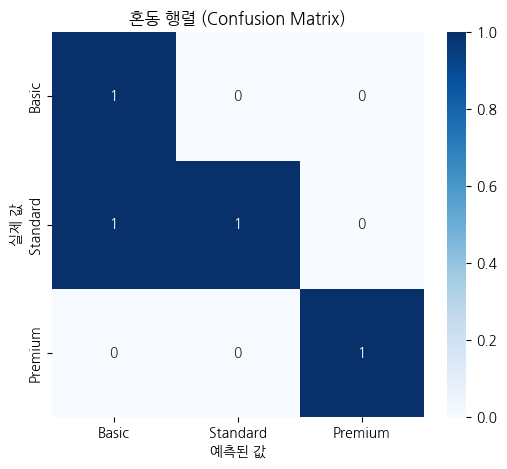

ÏòàÏ∏°Îêú Íµ¨ÎèÖ ÌîåÎûú: Î≤†Ïù¥ÏßÅ
Í∞Å Íµ¨ÎèÖ ÌîåÎûú ÏÑ†ÌÉù ÌôïÎ•†: Î≤†Ïù¥ÏßÅ=0.63, Ïä§ÌÉ†Îã§Îìú=0.36, ÌîÑÎ¶¨ÎØ∏ÏóÑ=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
#Í≥†Í∞ù ÌôúÎèô Í∏∞Î∞ò Íµ¨ÎèÖ ÌîåÎûú Ï∂îÏ≤ú (Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÏòàÏ∏°)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Í∞ÄÏÉÅÏùò Í≥†Í∞ù Íµ¨ÎèÖ ÌîåÎûú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'num_logins': [2, 15, 3, 10, 20, 12, 5, 9, 18, 4,
                   8, 11, 6, 13, 22, 14, 7, 10, 19, 5],
    'num_watched_videos': [1, 10, 2, 7, 15, 9, 3, 6, 13, 2,
                            5, 8, 3, 9, 18, 11, 4, 7, 14, 4],
    'avg_watch_time': [5, 40, 8, 30, 60, 35, 12, 28, 50, 6,
                       18, 32, 10, 33, 70, 45, 9, 29, 55, 14],
    'subscription_plan': [0, 1, 0, 1, 2, 1, 0, 1, 2, 0,
                          1, 1, 0, 1, 2, 1, 0, 1, 2, 0]  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ (0=Î≤†Ïù¥ÏßÅ, 1=Ïä§ÌÉ†Îã§Îìú, 2=ÌîÑÎ¶¨ÎØ∏ÏóÑ)
}

df = pd.DataFrame(data)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÎèÖÎ¶ΩÎ≥ÄÏàò X, Ï¢ÖÏÜçÎ≥ÄÏàò y)
X = df[['age', 'num_logins', 'num_watched_videos', 'avg_watch_time']]
y = df['subscription_plan']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî ÏûÖÎ†• Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
# Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± (Softmax Regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred = model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.2f}")
print("ÌòºÎèô ÌñâÎ†¨:")
print(conf_matrix)
print("Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
print(report)

#ÏãúÍ∞ÅÌôî: ÌòºÎèô ÌñâÎ†¨
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Basic', 'Standard', 'Premium'], yticklabels=['Basic', 'Standard', 'Premium'])
plt.xlabel("ÏòàÏ∏°Îêú Í∞í")
plt.ylabel("Ïã§Ï†ú Í∞í")
plt.title("ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix)")
plt.show()

# ÏÉàÎ°úÏö¥ Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
new_customer = np.array([[27, 8, 5, 20]])  # [ÎÇòÏù¥, Î°úÍ∑∏Ïù∏ Ïàò, ÏãúÏ≤≠Ìïú ÏòÅÏÉÅ Ïàò, ÌèâÍ∑† ÏãúÏ≤≠ ÏãúÍ∞Ñ]
new_customer_scaled = scaler.transform(new_customer)

# ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
predicted_plan = model.predict(new_customer_scaled)[0] #ÏòàÏ∏°ÎêúÍ∞íÏ§ë Ï≤´Î≤àÏß∏Í∞ÄÏ†∏Ïò¥
predicted_proba = model.predict_proba(new_customer_scaled) #Ïä§ÏºÄÏùºÎßÅ: Î™®Îç∏Ïù¥ ÌõàÎ†®Îêú Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥, ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º **StandardScaler**Î°ú Ï†ïÍ∑úÌôî.
                                                           # ÌõàÎ†®Îêú Ïä§ÏºÄÏùºÎü¨Î•º ÏÇ¨Ïö©Ìï¥ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

plan_names = {0: "Î≤†Ïù¥ÏßÅ", 1: "Ïä§ÌÉ†Îã§Îìú", 2: "ÌîÑÎ¶¨ÎØ∏ÏóÑ"}
print(f"ÏòàÏ∏°Îêú Íµ¨ÎèÖ ÌîåÎûú: {plan_names[predicted_plan]}")
print(f"Í∞Å Íµ¨ÎèÖ ÌîåÎûú ÏÑ†ÌÉù ÌôïÎ•†: Î≤†Ïù¥ÏßÅ={predicted_proba[0][0]:.2f}, Ïä§ÌÉ†Îã§Îìú={predicted_proba[0][1]:.2f}, ÌîÑÎ¶¨ÎØ∏ÏóÑ={predicted_proba[0][2]:.2f}")



* Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 75%ÎùºÎäî Í≤ÉÏùÄ Ï†ÑÏ≤¥ 4Í∞úÏ§ë 3Í∞úÎßå ÎßûÏ∂ò Í≤ÉÏúºÎ°ú Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï¢ãÏùÄ ÏÑ±Îä•Ïù¥ÎÇò, Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÑ±Îä•Ï∞®Ïù¥Î•º Í∞êÏïàÌï† ÌïÑÏöîÏûàÏùå.
* Î≤†Ïù¥ÏßÅ ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïã§Ï†ú Î≤†Ïù¥ÏßÅÏùÑ 100% Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°
* Ïä§ÌÉ†Îã§Îìú ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïã§Ï†ú Ïä§ÌÉ†Îã§ÎìúÎ•º Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°ÌñàÏúºÎÇò Î≤†Ïù¥ÏßÅÏúºÎ°úÎèÑ ÏòàÏ∏°Ìï®. Ïã§Ï†ú Ïä§ÌÉ†Îã§Ïùò 50%Îßå Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°.
*Ïù¥Îäî Î™®Îç∏Ïù¥ Íµ¨ÎèÖ Ïú†ÌòïÏùÑ Îçî ÎÑìÏùÄ Î≤îÏúÑÎ°ú ÏòàÏ∏°ÌïòÍ≥† ÏûàÎã§Îäî ÎúªÏûÑ.
* ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌÅ¥ÎûòÏä§Îäî Ïã§Ï†ú ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÑ 100% Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°.
* Î≤†Ïù¥ÏßÅ ÌÅ¥ÎûòÏä§Ïùò Ï†ïÎ∞ÄÎèÑÎäî 0.5Î°ú Ïã§Ï†ú ÏòàÏ∏°Ìïú Í≤É Ï§ë 50%Îßå Î≤†Ïù¥ÏßÅ Íµ¨ÎèÖÏûÑ.
* Ïä§ÌÉ†Îã§ÎìúÏôÄ ÌîÑÎ¶¨ÎØ∏ÏóÑÏùò Ï†ïÎ∞ÄÎèÑÎäî Î™®Îëê 1Î°ú ÏòàÏ∏°Ïùò 100%Í∞Ä Ïã§Ï†ú Íµ¨ÎèÖ ÌîåÎûúÏûÑ.




In [16]:
# Í≥†Í∞ù Ï∂©ÏÑ±ÎèÑ Îì±Í∏â ÏòàÏ∏°
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Í∞ÄÏÉÅÏùò Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'age': [22, 45, 25, 33, 50, 41, 29, 39, 48, 23, 31, 36, 27, 40, 53, 44, 26, 38, 51, 30],
    'monthly_purchases': [1, 5, 2, 3, 6, 4, 2, 3, 5, 1, 3, 4, 2, 4, 6, 5, 2, 3, 5, 2],
    'monthly_spending': [50, 300, 80, 200, 400, 250, 100, 220, 380, 60, 180, 240, 90, 270, 420, 320, 75, 230, 390, 110],
    'customer_support_calls': [3, 1, 4, 2, 0, 1, 3, 2, 0, 4, 2, 1, 3, 1, 0, 1, 4, 2, 0, 3],
    'loyalty_level': [0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0]  # 0=ÎÇÆÏùå, 1=Ï§ëÍ∞Ñ, 2=ÎÜíÏùå
}

df = pd.DataFrame(data)

# ÎèÖÎ¶Ω Î≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò(y) Î∂ÑÎ¶¨
X = df[['age', 'monthly_purchases', 'monthly_spending', 'customer_support_calls']]
y = df['loyalty_level']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® 80%, ÌÖåÏä§Ìä∏ 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_loyalty(age, monthly_purchases, monthly_spending, customer_support_calls):
    """ ÏûÖÎ†•Í∞íÏùÑ Î∞õÏïÑ Í≥†Í∞ù Ï∂©ÏÑ±ÎèÑ Îì±Í∏âÏùÑ ÏòàÏ∏° """
    input_data = np.array([[age, monthly_purchases, monthly_spending, customer_support_calls]])
    input_scaled = scaler.transform(input_data)

    predicted_class = model.predict(input_scaled)[0]
    predicted_proba = model.predict_proba(input_scaled)

    loyalty_labels = {0: "ÎÇÆÏùå", 1: "Ï§ëÍ∞Ñ", 2: "ÎÜíÏùå"}

    print(f"\nüîπ ÏòàÏ∏°Îêú Í≥†Í∞ù Ï∂©ÏÑ±ÎèÑ Îì±Í∏â: {loyalty_labels[predicted_class]}")
    print(f"üîπ Í∞Å Îì±Í∏â ÌôïÎ•†: ÎÇÆÏùå={predicted_proba[0][0]:.2f}, Ï§ëÍ∞Ñ={predicted_proba[0][1]:.2f}, ÎÜíÏùå={predicted_proba[0][2]:.2f}")

# ÏòàÏ∏° ÏòàÏ†ú Ïã§Ìñâ
predict_loyalty(30, 4, 200, 2)  # ÎÇòÏù¥=30, Ïõî ÌèâÍ∑† Íµ¨Îß§=4Ìöå, Ïõî ÌèâÍ∑† Íµ¨Îß§Ïï°=200, Í≥†Í∞ùÏÑºÌÑ∞ Î¨∏Ïùò=2Ìöå



üîπ ÏòàÏ∏°Îêú Í≥†Í∞ù Ï∂©ÏÑ±ÎèÑ Îì±Í∏â: Ï§ëÍ∞Ñ
üîπ Í∞Å Îì±Í∏â ÌôïÎ•†: ÎÇÆÏùå=0.21, Ï§ëÍ∞Ñ=0.73, ÎÜíÏùå=0.06


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
